In [8]:
from IPython.display import Image

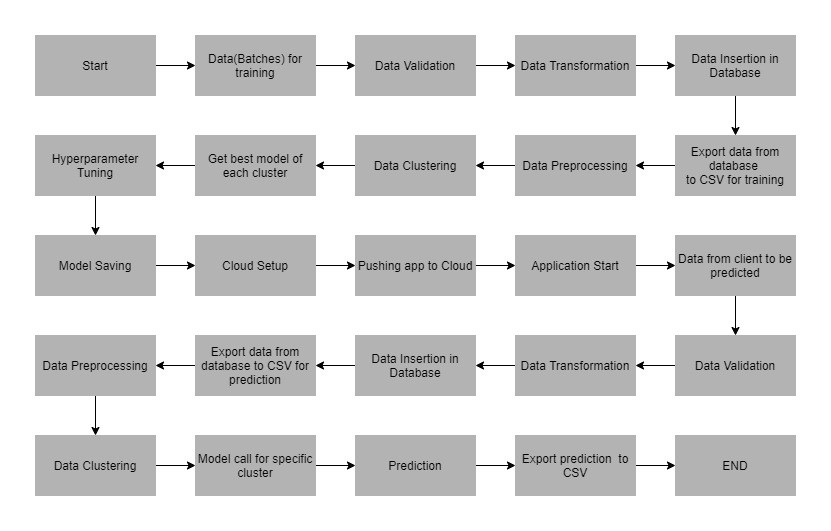

In [9]:
Image(filename='D:/ineuron/final_projects/thyroid detection/Thyroid_Detection/project architecture.jpg')

In [10]:
import pandas as pd

In [11]:
train = pd.read_csv('train.csv')

FileNotFoundError: [Errno 2] File train.csv does not exist: 'train.csv'

In [ ]:
campaign = pd.read_csv('campaign_data.csv')

In [ ]:
coupon = pd.read_csv('coupon_item_mapping.csv')

In [ ]:
customer = pd.read_csv('customer_demographics.csv')

In [ ]:
customer_trans = pd.read_csv('customer_transaction_data.csv')

In [ ]:
item = pd.read_csv('item_data.csv')

In [ ]:
item_trans = item.merge(customer_trans,on='item_id')

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
gk = item_trans.groupby('customer_id')

In [ ]:
item_trans.head()

In [ ]:
item_trans_coup = item_trans.merge(coupon,on='item_id')

In [ ]:
item_trans_coup.nunique()

In [ ]:
item_trans_coup_cust_test = test.merge(item_trans_coup,on='customer_id',left_index=True,right_index=True)

In [ ]:
item_trans_coup_cust = train.merge(item_trans_coup,on='customer_id',left_index=True,right_index=True)

In [ ]:
item_trans_coup_cust = item_trans_coup_cust.drop(['campaign_id','id','item_id','coupon_id_y','coupon_id_x','customer_id'],axis=1)

In [ ]:
item_trans_coup_cust_test = item_trans_coup_cust_test.drop(['campaign_id','id','coupon_id_y','coupon_id_x','customer_id'],axis=1)

In [ ]:
item_trans_coup_cust.isnull().sum()

In [ ]:
item_trans_coup_cust_test.isnull().sum()

In [ ]:
item_trans_coup_cust.head()

In [ ]:
all_data = pd.concat((item_trans_coup_cust.drop('redemption_status',axis=1),
                     item_trans_coup_cust_test))
print("all_data size is: {} ".format(all_data.shape))
all_data_na = (all_data.isnull().sum()/ len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)
# [:30]
missing_data =pd.DataFrame({'Missing Raio':all_data_na})
missing_data.head(20)

In [ ]:
all_data.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('brand', 'brand_type', 'category', 'coupon_discount', 'date', 'item_id',
       'other_discount', 'quantity', 'selling_price')
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
#shape
print('Shape all_data: {}'.format(all_data.shape))

In [ ]:
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
numeric_features = all_data.dtypes[all_data.dtypes != "object"].index

skewed_features = all_data[numeric_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)
#compute skewness
print ("\skew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})   
skewness.head(7)

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print ("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p 
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

In [ ]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train= train.redemption_status.values
train = pd.DataFrame(all_data[:ntrain])
test = pd.DataFrame(all_data[ntrain:])

In [ ]:
CVtrain_X, CVtest_X, CVtrain_Y, CVtest_Y = train_test_split(train, y_train, test_size = 0.2,random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(CVtrain_X,CVtrain_Y)

# Predicting the test set results

Y_Pred = classifier.predict(CVtest_X)

# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(CVtest_Y, Y_Pred)


In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(CVtest_Y, Y_Pred)

In [ ]:
y_pred = classifier.predict(test)

In [ ]:
df = pd.DataFrame()
df['y_pred'] = y_pred
df['y_pred'].value_counts()
submission = pd.read_csv('sample_submission.csv')

In [ ]:
submission['redemption_status'] = y_pred
submission.to_csv('output_submission.csv', index=False)
#submission.to_csv('C:\Users\kumar\OneDrive\Desktop\AmExpert\submission.csv', index=False)